In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=1
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib

import os
import pickle
import sys
sys.path.append("..")
from scripts.utils import get_path
from vis_utils.loaders import load_dataset
from vis_utils.plot import hists_from_graph_embd, plot_scatter

env: CUDA_VISIBLE_DEVICES=1


In [2]:
root_path = get_path("data")
fig_path = get_path("figures")

In [9]:
dataset = "mnist"
k=15
nbs_noise = [5, 50, 500]
batch_size = 1024
parametric = False
optimizer = "sgd"
loss_mode = "infonce"
rescale = 1.0
clamp_low = 1e-10
lr_min_factor = 0.0
momentum = 0.0
anneal_lr = True
seed = 0

In [4]:
# set up matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = "Times New Roman"
cmap = matplotlib.cm.get_cmap("tab10")

In [5]:
# get data
x, y, sknn_graph, pca2 = load_dataset(root_path, dataset)

## vary n_noise

In [12]:
n_epochs = 750
init = "pca"
embedders = []

for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl")
    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)
    print(f"done with n_noise={n_noise}")

done with n_noise=5
done with n_noise=50
done with n_noise=500


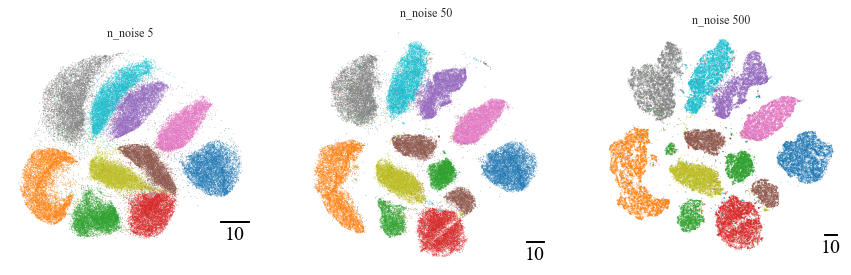

In [13]:
epoch = -1
fig, ax = plt.subplots(1, 3, figsize=(15,15))
for i in range(len(embedders)):
    embd = embedders[i].callback.embds[epoch]
    cax = ax[i]
    plot_scatter(cax, embd, y, f"n_noise {nbs_noise[i]}")


In [8]:
epoch = -1
for i in range(len(embedders)):
    plt.figure(figsize=(5,5))
    embd = embedders[i].callback.embds[epoch]
    plot_scatter(plt.gca(), embd, y)
    plt.savefig(os.path.join(fig_path,
                         f"infonce_no_EE_m_{nbs_noise[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

## early exaggeration

In [15]:
nbs_noise = [5, 50, 500]
n_epochs = 500
init = "EE"

embedders = []

for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl")
    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)
    print(f"done with n_noise={n_noise}")

done with n_noise=5
done with n_noise=50
done with n_noise=500


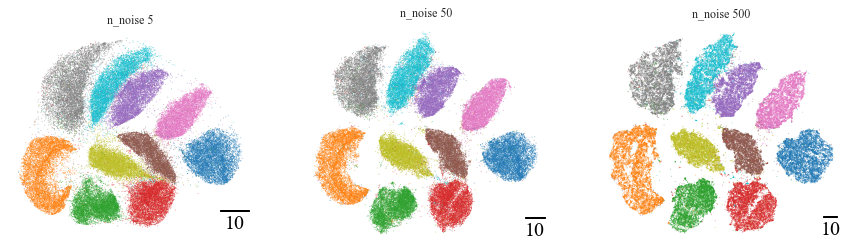

In [16]:
epoch = -1
fig, ax = plt.subplots(1, 3, figsize=(15,15))
for i in range(len(embedders)):
    embd = embedders[i].callback.embds[epoch]
    cax = ax[i]
    plot_scatter(cax, embd, y, f"n_noise {nbs_noise[i]}")


In [11]:
epoch = -1
for i in range(len(embedders)):
    plt.figure(figsize=(5,5))
    embd = embedders[i].callback.embds[epoch]
    plot_scatter(plt.gca(), embd, y)
    plt.savefig(os.path.join(fig_path,
                         f"infonce_m_{nbs_noise[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()

## random init

In [17]:
nbs_noise = [5, 50, 500]
n_epochs = 750
init="random"
embedders = []

for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init}_rescale_{rescale}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl")
    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)
    print(f"done with n_noise={n_noise}")

done with n_noise=5
done with n_noise=50
done with n_noise=500


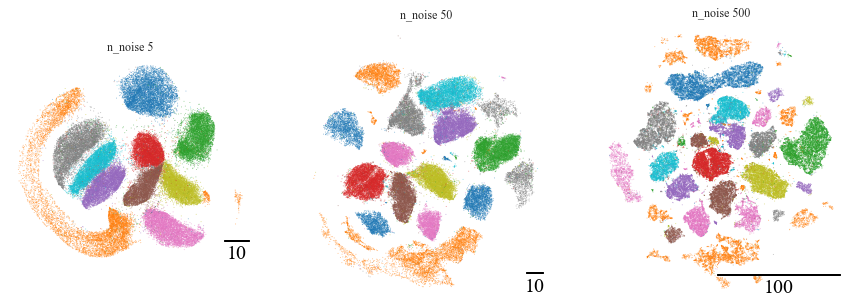

In [18]:
epoch = -1
fig, ax = plt.subplots(1, 3, figsize=(15,15))
for i in range(len(embedders)):
    embd = embedders[i].callback.embds[epoch]
    cax = ax[i]
    plot_scatter(cax, embd, y, f"n_noise {nbs_noise[i]}")

In [19]:
epoch = -1
for i in range(len(embedders)):
    plt.figure(figsize=(5,5))
    embd = embedders[i].callback.embds[epoch]
    plot_scatter(plt.gca(), embd, y)
    plt.savefig(os.path.join(fig_path,
                         f"infonce_random_m_{nbs_noise[i]}.png"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200,
            transparent=False,
            facecolor='white')
    plt.close()